In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

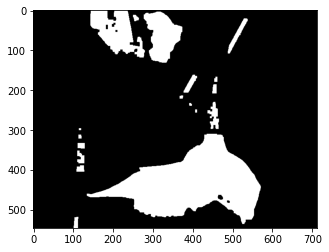

In [3]:
img = cv2.imread("test.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, "gray")

contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [] #list to hold all areas

for contour in contours:
    ar= cv2.contourArea(contour)
    areas.append(ar)

max_area = max(areas)
max_area_index = areas.index(max_area) #index of the list element with largest area

cnt = contours[max_area_index] #largest area contour

cv2.drawContours(closing, [cnt], 0, (255, 255, 255), 3, maxLevel = 0)
cv2.imshow('cleaner', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread("test.png")
#img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh, kernel, iterations = 1)

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

areas = []
for contour in contours:
    ar = cv2.contourArea(contour)
    areas.append(ar)

max_area = max(areas)
max_area_index = areas.index(max_area)
    
cnt = contours[max_area_index] #largest area contour

cv2.drawContours(closing, [cnt], 0, (255, 255, 255), 3, maxLevel = 0)
cv2.imshow('cleaner', closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
b = cv2.imread("../beach.png")
c = cv2.imread("../crab.png")

rows, cols, chan = c.shape
roi = b[280:rows, 500:cols]

img_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

mask_inv = cv2.bitwise_not(mask)

b_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
c_fg = cv2.bitwise_and(c, c, mask=mask)

dst = cv2.add(b_bg, c_fg)
b[280:rows, 500:cols] = dst


cv2.imshow("b", cv2.resize(b, (int(b.shape[1]/2), int(b.shape[0]/2))))
cv2.imshow("Image", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.2.0) ../modules/core/src/arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [ ]:
print(c.shape)

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def contraste():                                    # funcion para pasar imagen a blanco y negro 
	image=cv2.imread('captura.png')                 # lee la captura de imagen         
	im=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)       # pasa a escala de grises
	im=(255-im)                                     # foto en negativo
	umbral=170
	img=np.zeros(shape=im.shape)                    # pasa a blanco y negro puros (umbral en 170)
	for i in range(im.shape[0]):
		for j in range(im.shape[1]):
			if im[i][j]>umbral: img[i][j]=255
			else: img[i][j]=0
	#cv2.imshow('img', img)                          # muestra la imagen
	cv2.imwrite('b&w.png', img)                     # guarda imagen en blanco y negro
	cv2.waitKey(1)     

In [ ]:
def contorno():                                     # funcion captura de contorno, captura letras
	umbral_fino=10                                  # umbral fino para deteccion de contornos
	image=cv2.imread('b&w.png')                     # lee la imagen
	im=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)       # pasa a grises
	im=(255-im)                                     # pasa a negativo
	thresh=cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)      # umbral adaptativo
	rect_kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10))                                          # elemento estructural (rectangular) 
	threshed=cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rect_kernel)                                          # transformacion morfologica
	contorno, _ =cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)                      # encuentra los contornos
	s_contorno=sorted(contorno, key=lambda x: cv2.boundingRect(x)[1]+cv2.boundingRect(x)[0]*image.shape[1])  # ordena por orden lateral (y+xh)
	idx=0
	for cnt in s_contorno:                                   # contornos
		idx+=1
		x, y, w, h=cv2.boundingRect(cnt)
		roi=im[y:y+h, x:x+w]                                 # region de interes
		if h<umbral_fino or w<umbral_fino:
			continue
		cv2.imwrite(str(idx) + '.png', roi)
		cv2.rectangle(im, (x, y), (x+w, y+h), (200, 0, 0), 2)
	#cv2.imshow('imagen B-N', im)
	cv2.waitKey(1)
	return idx

In [ ]:
img = cv2.imread("nico.jpeg")
img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = (255-gray)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2) 
rect_kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (30, 10)) 
threshed=cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rect_kernel)
contorno, _ =cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)                      # encuentra los contornos
s_contorno=sorted(contorno, key=lambda x: cv2.boundingRect(x)[1]+cv2.boundingRect(x)[0]*img.shape[1])

umbral_fino=10
idx=0
for cnt in s_contorno:                                   # contornos
    idx+=1
    x, y, w, h=cv2.boundingRect(cnt)
    roi=img[y:y+h, x:x+w]                                 # region de interes
    if h<umbral_fino or w<umbral_fino:
        continue
    cv2.imwrite(str(idx) + '.png', roi)
    cv2.rectangle(img, (x, y), (x+w, y+h), (200, 0, 0), 2)


# cv2.imshow("Nico", contorno)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
s_contorno